## Reading and Understanding the Data

In [164]:
# Ignore Warnings

import warnings
warnings.filterwarnings('ignore')

In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm

In [166]:
#readng the data

bike = pd.read_csv(r"C:\Users\Vikrant\Downloads\day.csv")

In [167]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [168]:
bike.info

<bound method DataFrame.info of      instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0          1  01-01-2018       1   0     1        0        1           1   
1          2  02-01-2018       1   0     1        0        2           1   
2          3  03-01-2018       1   0     1        0        3           1   
3          4  04-01-2018       1   0     1        0        4           1   
4          5  05-01-2018       1   0     1        0        5           1   
..       ...         ...     ...  ..   ...      ...      ...         ...   
725      726  27-12-2019       1   1    12        0        5           1   
726      727  28-12-2019       1   1    12        0        6           0   
727      728  29-12-2019       1   1    12        0        0           0   
728      729  30-12-2019       1   1    12        0        1           1   
729      730  31-12-2019       1   1    12        0        2           1   

     weathersit       temp     atemp      hum  windspee

In [169]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [170]:
bike.shape

(730, 16)

## Data quality check

### Check for NULL/MISSING values

In [171]:
# percentage of missing values in each column

round(100*(bike.isnull().sum()/len(bike)), 2).sort_values(ascending=False)

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [172]:
# row-wise null count percentage

round(100*(bike.isnull().sum(axis=1)/len(bike)), 2).sort_values(ascending=False)

0      0.0
479    0.0
481    0.0
482    0.0
483    0.0
      ... 
245    0.0
246    0.0
247    0.0
248    0.0
729    0.0
Length: 730, dtype: float64

#### Inference:

There are no missing / Null values either in columns or rows.

### Duplicate Check

In [173]:
bike_duplicate = bike.copy()

In [174]:
# Checking for duplicates and dropping the entire duplicate row if any

bike_duplicate.drop_duplicates(subset=None, inplace=True)

In [175]:
bike_duplicate.shape

(730, 16)

In [176]:
bike.shape

(730, 16)

#### Inference

There are zero duplicate values in the dataset, since the duplicate dataset and the original dataset has same shape.

### Data Cleaning

In [177]:
# Checking value_counts() for entire dataframe.

In [178]:
bike2=bike.iloc[:,1:16]

In [179]:
for i in bike2:
    print(bike2[i].value_counts(ascending=False), '\n\n\n')

23-04-2018    1
07-05-2018    1
09-05-2019    1
28-07-2019    1
18-10-2018    1
             ..
27-06-2019    1
16-03-2018    1
29-04-2019    1
09-03-2019    1
23-08-2018    1
Name: dteday, Length: 730, dtype: int64 



3    188
2    184
1    180
4    178
Name: season, dtype: int64 



0    365
1    365
Name: yr, dtype: int64 



1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: mnth, dtype: int64 



0    709
1     21
Name: holiday, dtype: int64 



1    105
2    105
0    104
3    104
4    104
5    104
6    104
Name: weekday, dtype: int64 



1    504
0    226
Name: workingday, dtype: int64 



1    463
2    246
3     21
Name: weathersit, dtype: int64 



10.899153    5
26.035000    5
29.144153    4
27.880000    4
23.130847    4
            ..
10.909567    1
17.459153    1
12.265847    1
27.230847    1
17.425000    1
Name: temp, Length: 498, dtype: int64 



32.73440    4
18.78105    3
31.85040    3
29.76730    2
28.72500

#### inference:

No Junk/Unknown values present in the entire dataframe.

### Removing unnecessary columns

In [180]:
bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [181]:
# removing instant column, since it's only an index value

In [182]:
#removing dteday column, since we already have yr and month column. So i found this column unncessary.

In [183]:
# removing columns casual and registered since, as per the problem statement, we have to focus on cnt variable(which already has total of these both variables.)

In [184]:
#creating new dataframe bike_new as per our requirements stated above.

bike_new=bike[['season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt']]

In [185]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


### Creating Dummy Variables

In [186]:
# let's create dummy variables for 4 variables 'mnth', 'weekday', 'season' & 'weathersit' with datatype as category.

In [187]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [188]:
# Converting to 'category' data type

bike_new['season']=bike_new['season'].astype('category')
bike_new['weathersit']=bike_new['weathersit'].astype('category')
bike_new['mnth']=bike_new['mnth'].astype('category')
bike_new['weekday']=bike_new['weekday'].astype('category')

In [189]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 49.7 KB


In [190]:
# replacing 'mnth', 'weekday', 'season' & 'weathersit' with string values

bike_new.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)

bike_new.weathersit.replace({1:'good',2:'moderate',3:'bad',4:'severe'},inplace = True)

bike_new.mnth = bike_new.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})

bike_new.weekday = bike_new.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'})

In [191]:
bike_new.head(7)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,mon,1,moderate,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,moderate,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,good,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,good,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,good,9.305237,11.46350,43.6957,12.522300,1600
5,spring,0,jan,0,sat,0,good,8.378268,11.66045,51.8261,6.000868,1606
6,spring,0,jan,0,sun,0,moderate,8.057402,10.44195,49.8696,11.304642,1510


In [192]:
bike_new.shape

(730, 12)

### Splitting the data

In [193]:
# Splitting the data to Train and Test(70:30 ratio).


In [194]:
bike_new.shape

(730, 12)

In [195]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


In [196]:
# using train_test_split method from sklearn package for splitting

df_train, df_test = train_test_split(bike_new, train_size = 0.70, test_size = 0.30, random_state = 100)
print(df_train.shape)
print(df_test.shape)

(510, 12)
(219, 12)


### EDA on training dataset

In [197]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      510 non-null    object 
 1   yr          510 non-null    int64  
 2   mnth        510 non-null    object 
 3   holiday     510 non-null    int64  
 4   weekday     510 non-null    object 
 5   workingday  510 non-null    int64  
 6   weathersit  510 non-null    object 
 7   temp        510 non-null    float64
 8   atemp       510 non-null    float64
 9   hum         510 non-null    float64
 10  windspeed   510 non-null    float64
 11  cnt         510 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 51.8+ KB


In [198]:
df_train.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [199]:
# Visualizing numerical variables

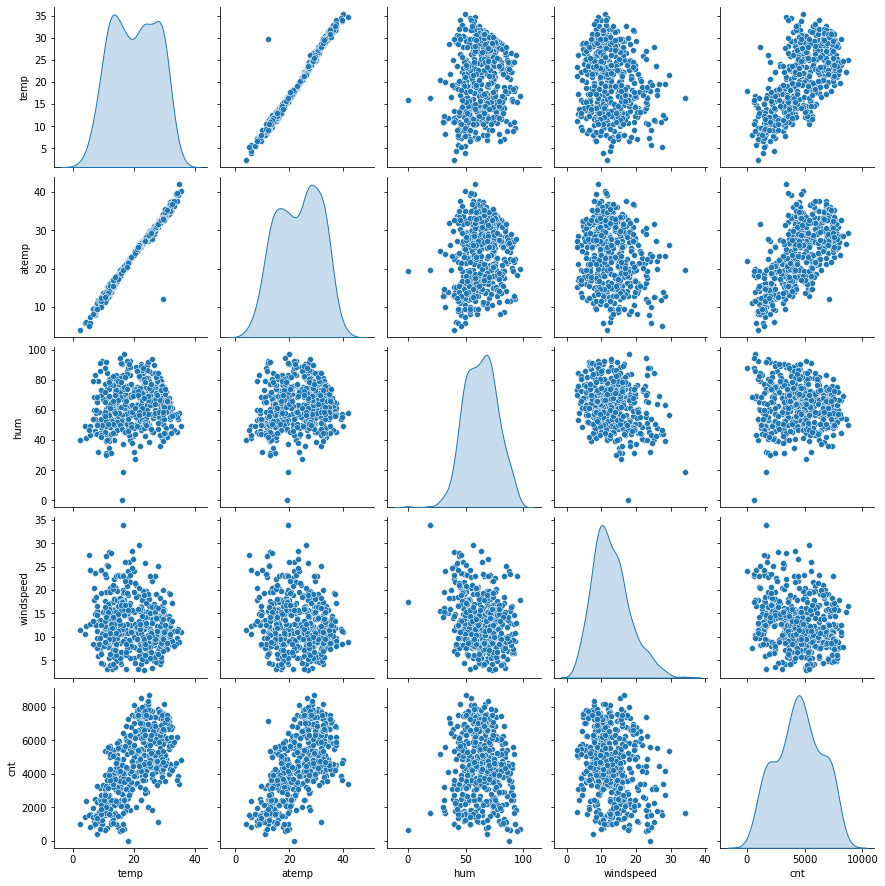

In [200]:
#Drawing pairplots for numeric variables only

bike_num=df_train[[ 'temp', 'atemp', 'hum', 'windspeed','cnt']]

sns.pairplot(bike_num, diag_kind='kde')
plt.show()

#### Inference:

1. temp and atemp are highly co-related with each other
2. Output/taregt variable has a linear relationship with variables like temp, atemp.

In [201]:
# Visualizing categorical variables

In [202]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      510 non-null    object 
 1   yr          510 non-null    int64  
 2   mnth        510 non-null    object 
 3   holiday     510 non-null    int64  
 4   weekday     510 non-null    object 
 5   workingday  510 non-null    int64  
 6   weathersit  510 non-null    object 
 7   temp        510 non-null    float64
 8   atemp       510 non-null    float64
 9   hum         510 non-null    float64
 10  windspeed   510 non-null    float64
 11  cnt         510 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 51.8+ KB


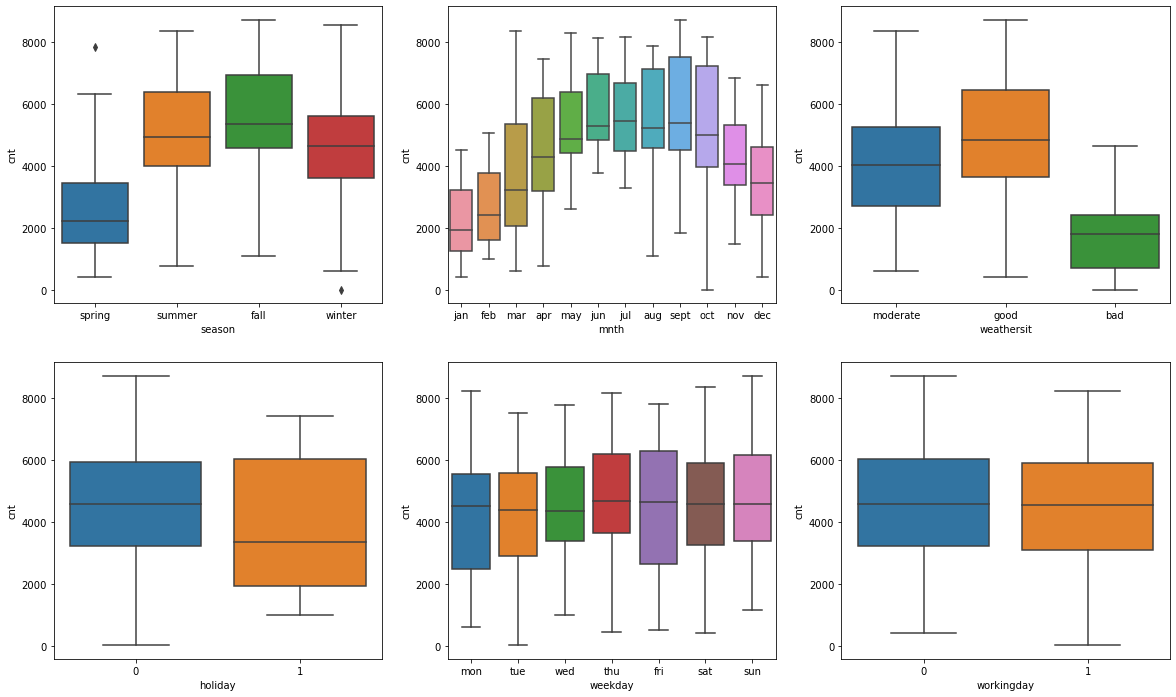

In [203]:
# Build boxplot of all categorical variables againt the target variable 'cnt'  for bike_new dataframe
# to see how each of the predictor variable stackup against the target variable.

plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_new)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_new)
plt.subplot(2,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_new)
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_new)
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_new)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_new)
plt.show()

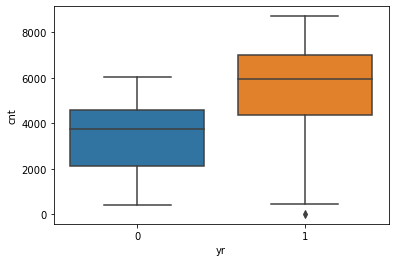

In [204]:
sns.boxplot(x = 'yr', y = 'cnt', data = bike_new)
plt.show()

#### Inference:

    1. Season 3: fall has highest demand for rental bikes.
    2. Demand is continuously growing each month till June. September month has highest demand. After September, demand is            decreasing.
    3. On holidays, demand has decreased.
    4. Weekday variable can have some or no influence towards the target variable.
    5. Demand is highest in 'good' weathershit.
    6. In September, bike sharing is at peak. During the year end and beginning, it is less ;Since in USA , it's either holiday        time and/or whether condition is bad.
    7. Demand grown in next year - 2019.

In [205]:
# plotting heatmap

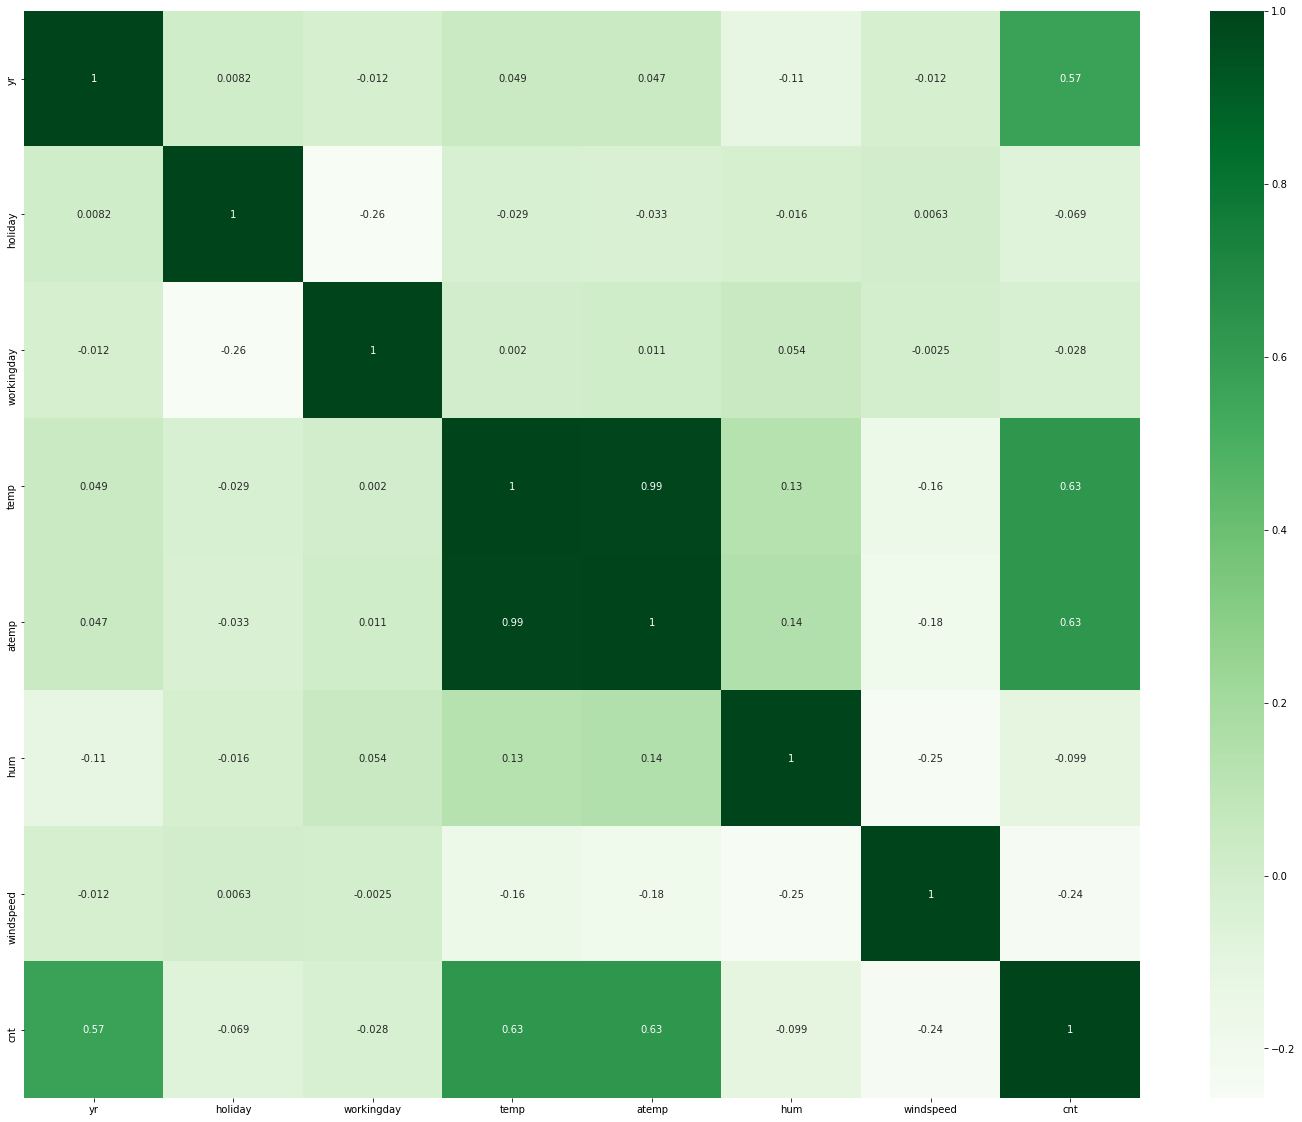

In [206]:
plt.figure(figsize = (25,20))
sns.heatmap(bike_new.corr(), annot = True, cmap="Greens")
plt.show()

#### Inference

Temp and Atemp are highly correlated, we can take an action to remove one of them, but lets keep them for further analysis.

Temp and Atemp also have high correlation with cnt variable.

### Rescaling the features

In [207]:
from sklearn.preprocessing import MinMaxScaler

In [208]:
#Using Normalized scaler to scale
scaler = MinMaxScaler()

In [209]:
df_train.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
653,winter,1,oct,0,wed,1,good,19.201653,23.0423,55.8333,12.208807,7534
576,fall,1,jul,0,wed,1,good,29.246653,33.1448,70.4167,11.083475,7216
426,spring,1,mar,0,sun,0,moderate,16.980847,20.6746,62.1250,10.792293,4066
728,spring,1,dec,0,mon,1,good,10.489153,11.5850,48.3333,23.500518,1796
482,summer,1,apr,0,sun,0,moderate,15.443347,18.8752,48.9583,8.708325,4220


In [210]:
df_train.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [211]:
# Apply scaler() to all the numeric variables

num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

# Fit and transform training set only
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [212]:
df_train.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
653,winter,1,oct,0,wed,1,good,0.509887,0.501133,0.575354,0.300794,0.864243
576,fall,1,jul,0,wed,1,good,0.815169,0.766351,0.725633,0.264686,0.827658
426,spring,1,mar,0,sun,0,moderate,0.442393,0.438975,0.640189,0.255342,0.465255
728,spring,1,dec,0,mon,1,good,0.245101,0.200348,0.498067,0.663106,0.204096
482,summer,1,apr,0,sun,0,moderate,0.395666,0.391735,0.504508,0.188475,0.482973


In [213]:
df_train.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

## Data Preparation for Linear Regression

In [214]:
bike_new = pd.get_dummies(data=bike_new,columns=["season","mnth","weekday"],drop_first=True)
bike_new = pd.get_dummies(data=bike_new,columns=["weathersit"])

In [215]:
bike_new.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_spring', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thu', 'weekday_tue',
       'weekday_wed', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')

In [216]:
bike_new.shape

(730, 31)

## Model building 

### Dividing into X and Y sets for the model building

In [217]:
#y to contain only target variable
y=bike_new.pop('cnt')

#X is all remainign variable also our independent variables
X=bike_new

#Train Test split with 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [218]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
653,1,0,1,19.201653,23.0423,55.8333,12.208807,0,0,1,...,0,0,0,0,0,0,1,0,1,0
576,1,0,1,29.246653,33.1448,70.4167,11.083475,0,0,0,...,0,0,0,0,0,0,1,0,1,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,1,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,1,10.489153,11.5850,48.3333,23.500518,1,0,0,...,0,1,0,0,0,0,0,0,1,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,0,1,0,...,0,0,0,1,0,0,0,0,0,1


In [219]:
# Checking shape and size for train and test
print(X_train.shape)
print(X_test.shape)

(511, 30)
(219, 30)


In [220]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed']

#Use Normalized scaler to scale
scaler = MinMaxScaler()

#Fit and transform training set only
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

In [221]:
X_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,...,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,0.508806,0.025440,0.712329,0.537386,0.513133,0.650333,0.320844,0.242661,0.246575,0.248532,...,0.080235,0.154599,0.129159,0.136986,0.142857,0.152642,0.136986,0.029354,0.626223,0.344423
std,0.500412,0.157613,0.453121,0.225640,0.212202,0.145741,0.169639,0.429112,0.431440,0.432585,...,0.271923,0.361876,0.335704,0.344170,0.350270,0.359994,0.344170,0.168963,0.484280,0.475645
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.341151,0.332910,0.538858,0.199179,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542077,0.529300,0.653499,0.298098,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754401,0.414438,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### RFE
Recursive feature elimination: 
We will be using the LinearRegression function from SciKit Learn for its compatibility with RFE.

In [222]:
# Using RFE to eliminate some columns 

In [223]:
# Importing RFE and LinearRegression

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [224]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # Cutting down number of features to 15 using automated approach
rfe = rfe.fit(X_train, y_train)

In [225]:
#Columns selected by RFE and their weightsrfe

In [226]:
#Columns selected by RFE and their weights

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('atemp', False, 9),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_aug', False, 11),
 ('mnth_dec', False, 2),
 ('mnth_feb', False, 3),
 ('mnth_jan', True, 1),
 ('mnth_jul', True, 1),
 ('mnth_jun', False, 13),
 ('mnth_mar', False, 16),
 ('mnth_may', False, 10),
 ('mnth_nov', True, 1),
 ('mnth_oct', False, 14),
 ('mnth_sept', True, 1),
 ('weekday_mon', False, 8),
 ('weekday_sat', False, 5),
 ('weekday_sun', False, 6),
 ('weekday_thu', False, 15),
 ('weekday_tue', False, 7),
 ('weekday_wed', False, 12),
 ('weathersit_bad', True, 1),
 ('weathersit_good', True, 1),
 ('weathersit_moderate', True, 1)]

In [227]:
# features selected by RFE.
col = X_train.columns[rfe.support_]

In [228]:
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_nov',
       'mnth_sept', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')

In [229]:
# Features not selected by RFE
X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jun',
       'mnth_mar', 'mnth_may', 'mnth_oct', 'weekday_mon', 'weekday_sat',
       'weekday_sun', 'weekday_thu', 'weekday_tue', 'weekday_wed'],
      dtype='object')

In [230]:
# Taking 15 columns supported by RFE for regression

X_train_rfe = X_train[col]
X_train_rfe

,yr,holiday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_jan,mnth_jul,mnth_nov,mnth_sept,weathersit_bad,weathersit_good,weathersit_moderate
653,1,0,0.509887,0.575354,0.300794,0,0,1,0,0,0,0,0,1,0
576,1,0,0.815169,0.725633,0.264686,0,0,0,0,1,0,0,0,1,0
426,1,0,0.442393,0.640189,0.255342,1,0,0,0,0,0,0,0,0,1
728,1,0,0.245101,0.498067,0.663106,1,0,0,0,0,0,0,0,1,0
482,1,0,0.395666,0.504508,0.188475,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1,0,0.863973,0.679690,0.187140,0,0,0,0,0,0,0,0,1,0
53,0,0,0.202618,0.435939,0.111379,1,0,0,0,0,0,0,0,1,0
350,0,0,0.248216,0.577930,0.431816,0,0,1,0,0,0,0,0,0,1
79,0,0,0.462664,0.759870,0.529881,0,1,0,0,0,0,0,0,0,1


## Build Model

### Function to build a model using statsmodel api

In [231]:
#Function to build a model using statsmodel api - Takes the columns to be selected for model as a parameter
def build_model(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm

### Function to calculate VIFs and print them

In [232]:
def get_vif(cols):
    df1 = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

### Model 1

In [233]:


# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [234]:
#Selected columns for Model 1 - all columns selected by RFE

cols = ['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_nov',
       'mnth_sept', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate']


In [235]:
build_model(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     191.3
Date:                Wed, 03 Nov 2021   Prob (F-statistic):          1.49e-189
Time:                        20:58:20   Log-Likelihood:                -4122.3
No. Observations:                 511   AIC:                             8275.
Df Residuals:                     496   BIC:                             8338.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1356.6029    

In [236]:
get_vif(cols)

               Features    VIF
13      weathersit_good  49.16
14  weathersit_moderate  32.49
5         season_spring   5.20
12       weathersit_bad   4.16
2                  temp   3.97
7         season_winter   3.77
6         season_summer   2.68
3                   hum   1.90
8              mnth_jan   1.57
9              mnth_jul   1.49
10             mnth_nov   1.48
11            mnth_sept   1.31
4             windspeed   1.21
0                    yr   1.04
1               holiday   1.03


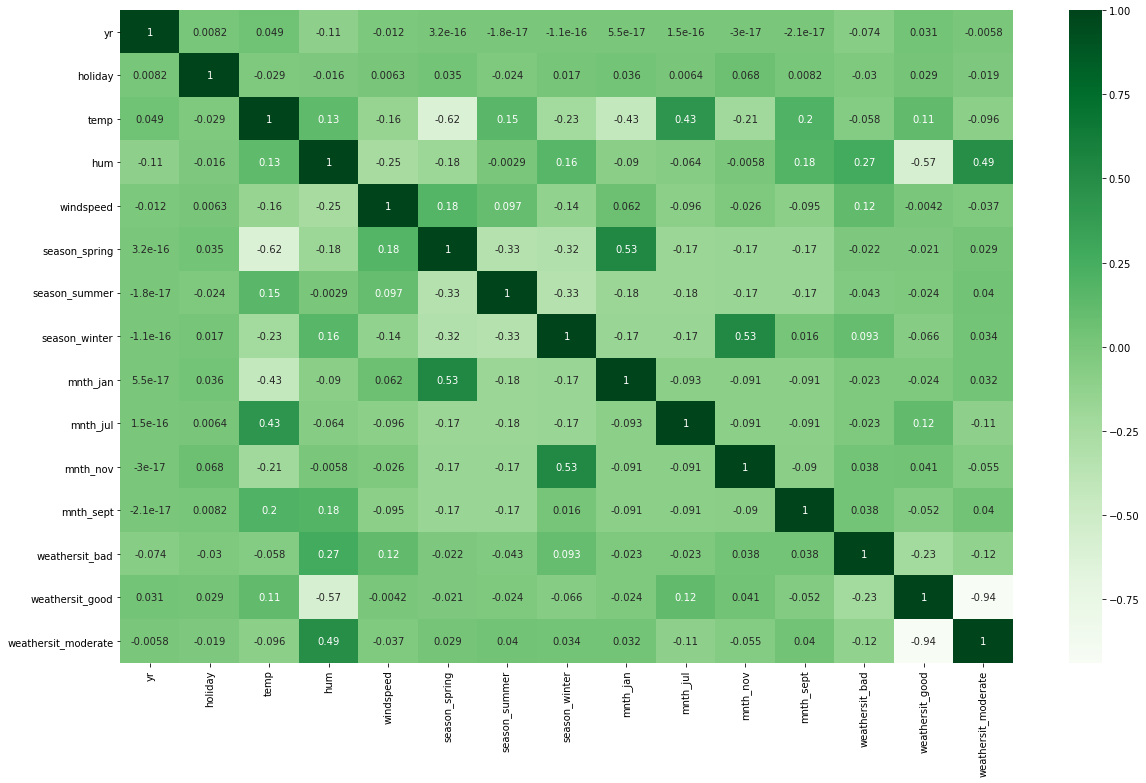

In [237]:
# Checking correlation of features selected by RFE with target column. 
# Also to check impact of different features on target.
plt.figure(figsize = (20,12))
sns.heatmap(bike_new[['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_nov',
       'mnth_sept', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate']].corr(), cmap='Greens', annot=True)
plt.show()

### Model 2

In [238]:
# Dropping the variable mnth_nov as it has negative coefficient and is insignificant as it has high p-value
cols = ['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_jul',
       'mnth_sept', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.4
Date:                Wed, 03 Nov 2021   Prob (F-statistic):          2.94e-190
Time:                        20:58:22   Log-Likelihood:                -4123.4
No. Observations:                 511   AIC:                             8275.
Df Residuals:                     497   BIC:                             8334.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1311.9176    

### Model 3

In [239]:
# Dropping the variable mnth_jan as it has negative coefficient and is insignificant as it has high p-value
cols = ['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul',
       'mnth_sept', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate']

lm3=build_model(cols)
lm3


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     221.1
Date:                Wed, 03 Nov 2021   Prob (F-statistic):          1.12e-190
Time:                        20:58:22   Log-Likelihood:                -4125.2
No. Observations:                 511   AIC:                             8276.
Df Residuals:                     498   BIC:                             8332.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1241.2278    

In [240]:
get_vif(cols)

               Features    VIF
11      weathersit_good  46.67
12  weathersit_moderate  31.14
5         season_spring   5.02
10       weathersit_bad   4.08
2                  temp   3.61
7         season_winter   3.49
6         season_summer   2.62
3                   hum   1.89
8              mnth_jul   1.48
9             mnth_sept   1.30
4             windspeed   1.19
0                    yr   1.03
1               holiday   1.02


### Model 4

In [241]:
# Dropping the variable 'weathersit_good' based on its Very High 'VIF' value.

cols = ['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul',
       'mnth_sept', 'weathersit_bad',
       'weathersit_moderate']

build_model(cols)
get_vif(cols)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     221.1
Date:                Wed, 03 Nov 2021   Prob (F-statistic):          1.12e-190
Time:                        20:58:22   Log-Likelihood:                -4125.2
No. Observations:                 511   AIC:                             8276.
Df Residuals:                     498   BIC:                             8332.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2495.9370    

### Model 5

In [242]:
# Dropping the variable 'hum' based on its Very High 'VIF' value.

In [243]:
cols = ['yr', 'holiday', 'temp', 'windspeed', 'season_spring',
      'season_summer', 'season_winter', 'mnth_jul',
      'mnth_sept', 'weathersit_bad',
      'weathersit_moderate']

In [244]:
X_train_sm5 = sm.add_constant(X_train[cols])
lm = sm.OLS(y_train, X_train_sm5).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.0
Date:                Wed, 03 Nov 2021   Prob (F-statistic):          2.09e-187
Time:                        20:58:22   Log-Likelihood:                -4135.8
No. Observations:                 511   AIC:                             8296.
Df Residuals:                     499   BIC:                             8346.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1749.8251    

In [245]:
X_train_sm5 = X_train_sm5.drop(['const'], axis=1)

In [246]:
get_vif(cols)

               Features   VIF
2                  temp  5.10
3             windspeed  4.61
5         season_summer  2.23
4         season_spring  2.08
0                    yr  2.07
6         season_winter  1.79
7              mnth_jul  1.58
10  weathersit_moderate  1.55
8             mnth_sept  1.34
9        weathersit_bad  1.08
1               holiday  1.04


### Model 6

In [247]:
# Dropping the variable 'mnth_jul' as it has negative coefficient and is insignificant as it has high p value.

In [248]:
X_train_new = X_train_sm5.drop(['mnth_jul'], axis = 1)

In [249]:
X_train_sm6 = sm.add_constant(X_train_new)
lm = sm.OLS(y_train, X_train_sm6).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     248.8
Date:                Wed, 03 Nov 2021   Prob (F-statistic):          6.20e-187
Time:                        20:58:23   Log-Likelihood:                -4139.8
No. Observations:                 511   AIC:                             8302.
Df Residuals:                     500   BIC:                             8348.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1674.8338    

In [250]:
X_train_sm6 = X_train_sm6.drop(['const'], axis=1)

In [251]:
get_vif(X_train_sm6.columns)

              Features   VIF
3            windspeed  4.60
2                 temp  3.84
0                   yr  2.07
4        season_spring  1.99
5        season_summer  1.90
6        season_winter  1.63
9  weathersit_moderate  1.55
7            mnth_sept  1.23
8       weathersit_bad  1.08
1              holiday  1.04


### Model 7

In [252]:
# Adding the variable 'mnth_jul' to see if the model improves.

In [253]:
X_train_sm6['mnth_jul'] = X_train['mnth_jul']


In [254]:
X_train_sm7 = sm.add_constant(X_train_sm6)
lm = sm.OLS(y_train, X_train_sm7).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.0
Date:                Wed, 03 Nov 2021   Prob (F-statistic):          2.09e-187
Time:                        20:58:23   Log-Likelihood:                -4135.8
No. Observations:                 511   AIC:                             8296.
Df Residuals:                     499   BIC:                             8346.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1749.8251    

In [255]:
get_vif(['yr', 'holiday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter','mnth_sept',
       'weathersit_bad', 'weathersit_good',
       'weathersit_moderate','mnth_jul'])

               Features    VIF
9       weathersit_good  32.98
10  weathersit_moderate  17.96
4         season_spring   4.96
2                  temp   3.38
6         season_winter   3.35
5         season_summer   2.60
8        weathersit_bad   2.53
11             mnth_jul   1.48
7             mnth_sept   1.29
3             windspeed   1.09
0                    yr   1.02
1               holiday   1.02


In [256]:
# Model is improved after adding column 'mnth-jul'.So we are keeping it.

#### Inference

Here VIF seems to be almost accepted. p-value for all the features is almost 0.0 and R2 is 0.835.

Let us select Model 6 as our final as it has all important statistics high (R-square, Adjusted R-squared and F-statistic), along with no insignificant variables and no multi coliinear (high VIF) variables. Difference between R-squared and Adjusted R-squared values for this model is veryless, which also means that there are no additional parameters that can be removed from this model.

In [257]:
#Build a model with all columns to select features automatically
def build_model_sk(X,y):
    lr1 = LinearRegression()
    lr1.fit(X,y)
    return lr1

In [258]:
cols = ['yr', 'holiday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter','mnth_sept',
       'weathersit_bad', 'weathersit_good',
       'weathersit_moderate','mnth_jul']

In [259]:
#Build a model with above columns
lr = build_model_sk(X_train[cols],y_train)
print(lr.intercept_,lr.coef_)

2.0427272540111594e+17 [ 2.02156118e+03 -7.57221373e+02  4.37747294e+03 -1.30537358e+03
 -5.70642471e+02  3.88750764e+02  6.88978747e+02  6.09221252e+02
 -2.04272725e+17 -2.04272725e+17 -2.04272725e+17 -4.48504843e+02]


## Model Evaluation (training model)

### Residucal Analysis

In [260]:
y_train_pred = lr.predict(X_train[cols])

In [261]:
#Plot a histogram of the error terms
def plot_res_dist(act, pred):
    sns.distplot(act-pred)
    plt.title('Error Terms')
    plt.xlabel('Errors')

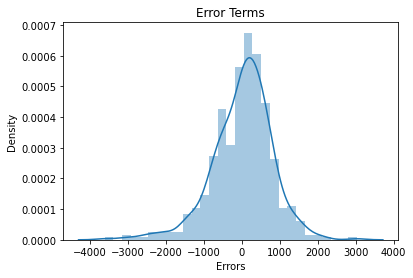

In [262]:
plot_res_dist(y_train, y_train_pred)

#### Inference :
    
Errors are normally distributed here with mean 0. So everything seems to be fine

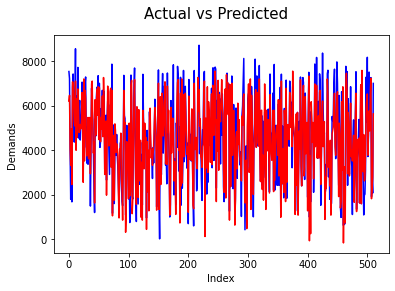

In [263]:
# Actual vs Predicted
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train, color="blue")
plt.plot(c,y_train_pred, color="red")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

#### Inference:
Actual and Predicted result following almost the same pattern so this model seems ok

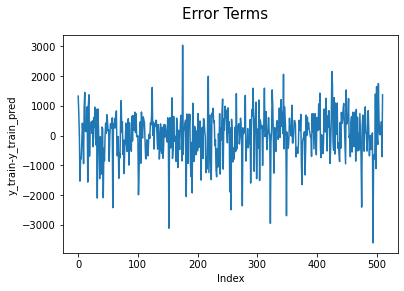

In [264]:
# Error Terms
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train-y_train_pred)
plt.suptitle('Error Terms', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('y_train-y_train_pred')
plt.show()

#### Inference:

Here,If we can see the error terms are independent of each other.

In [265]:
#Printing R-squared Value
r2_score(y_train,y_train_pred)

0.8345094719218098

#### Inference:

R2 is almost same as we obtained for our final model(Model 6 - 0.833)

### Linearity Check

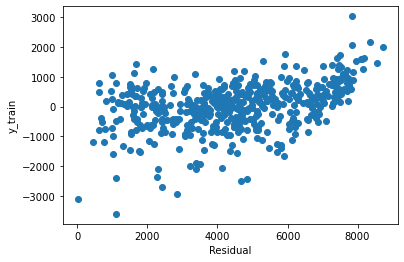

In [266]:
# scatter plot for the check
residual = (y_train - y_train_pred)
plt.scatter(y_train,residual)
plt.ylabel("y_train")
plt.xlabel("Residual")
plt.show()

## Predict values for test data set

In [267]:
X_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
184,0,1,0,29.793347,33.27085,63.7917,5.459106,0,0,0,...,0,0,0,0,0,0,1,0,0,1
535,1,0,1,32.082500,36.04875,59.2083,7.625404,0,1,0,...,0,0,0,0,1,0,0,0,1,0
299,0,0,0,19.270000,22.85230,81.2917,13.250121,0,0,1,...,0,0,1,0,0,0,0,0,0,1
221,0,0,1,31.433347,34.24915,42.4167,13.417286,0,0,0,...,0,0,0,0,0,0,0,0,1,0
152,0,0,0,29.315000,32.19710,30.5000,19.583229,0,1,0,...,0,0,1,0,0,0,0,0,1,0


In [268]:
#Scale variables in X_test
num_vars = ['temp','atemp','hum','windspeed']

In [269]:
#Test data to be transformed only, no fitting
X_test[num_vars] = scaler.transform(X_test[num_vars])

In [270]:
#Columns from our final model

cols = ['yr','holiday','temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter','mnth_sept',
       'weathersit_bad', 'weathersit_good',
       'weathersit_moderate','mnth_jul']

#Predict the values for test data
y_test_pred = lr.predict(X_test[cols])

###  R-Squared value for test predictions

In [271]:
# Find out the R squared value between test and predicted test data sets.  
r2_score(y_test,y_test_pred)

0.8057677276869564

#### Inference
R2 value for predictions on test data (0.806) is very close to R2 value of train data(0.835). This is a good R-squared value, hence we can see our model is performing good even on unseen data (test data).

### Homoscedacity

Text(0, 0.5, 'y_test_pred')

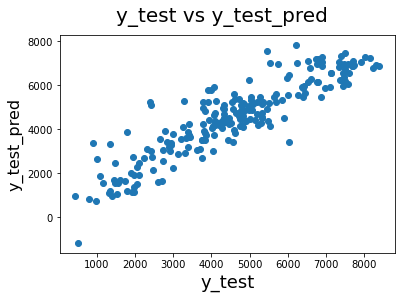

In [272]:
# Plotting y_test and y_test_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred', fontsize = 16)

#### Inference
We can observe that variance of the residuals (error terms) is constant across predictions. 
i.e error term does not vary much as the value of the predictor variable changes.

In [273]:
#Function to plot Actual vs Predicted
#Takes Actual and PRedicted values as input along with the scale and Title to indicate which data
def plot_act_pred(act,pred,scale,dataname):
    c = [i for i in range(1,scale,1)]
    fig = plt.figure(figsize=(14,5))
    plt.plot(c,act, color="blue", linewidth=2.5, linestyle="-")
    plt.plot(c,pred, color="red",  linewidth=2.5, linestyle="-")
    fig.suptitle('Actual and Predicted - '+dataname, fontsize=20)              # Plot heading 
    plt.xlabel('Index', fontsize=18)                               # X-label
    plt.ylabel('Counts', fontsize=16) 

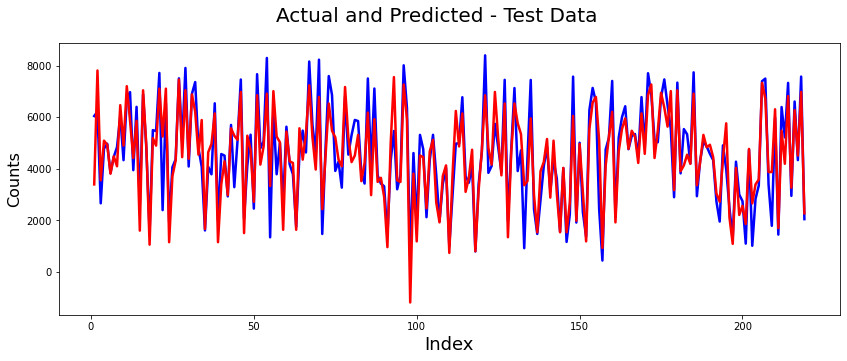

In [274]:
#Plot Actual vs Predicted for Test Data
plot_act_pred(y_test,y_test_pred,len(y_test)+1,'Test Data')

#### Inference
As we can see predictions for test data is very close to actuals

### Plot Error Terms for test data

In [275]:
# Error terms
def plot_err_terms(act,pred):
    c = [i for i in range(1,220,1)]
    fig = plt.figure(figsize=(14,5))
    plt.plot(c,act-pred, color="blue", marker='o', linewidth=2.5, linestyle="")
    fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
    plt.xlabel('Index', fontsize=18)                      # X-label
    plt.ylabel('Counts - Predicted Counts', fontsize=16)                # Y-label

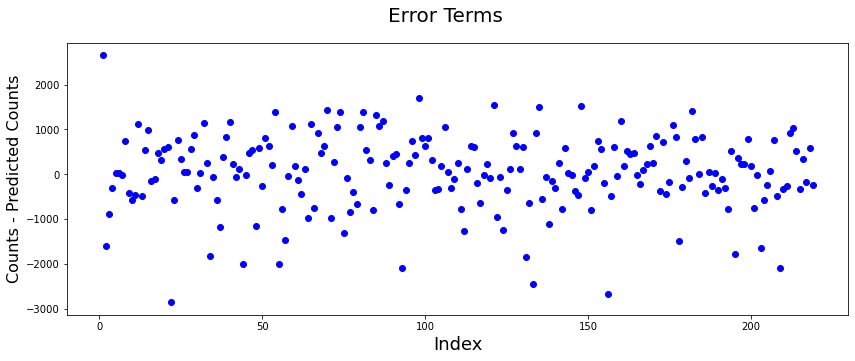

In [276]:
#Plot error terms for test data
plot_err_terms(y_test,y_test_pred)

#### Inference
As we can see the error terms are randomly distributed and there is no specific pattern visible.
This means the output is explained well by our model and there are no other parameters that can explain the model better.

In [277]:
r2 = r2_score(y_test,y_test_pred)

In [278]:
# adjusted_r2 for test predicted data

# n is number of rows in X
n = X_test.shape[0]

# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.7747732161476408

## Making Predictions

### Final Result Comparison:
- Train R^2 :0.835
- Train Adjusted R^2 :0.832
- Test R^2 :0.806
- Train Adjusted R^2 :0.775

This seems to be a good model that can 'Generalize' various datasets.

## Final interpretation:

The comapany __BoomBikes__ should focus on the following features:

1. Expanding business during Spring.
2. Expanding business during September.
3. Comparing previous data (year : 2018) it is expected to increase the demand of rental bikes once situation comes back to normal in 2019.
4. Temperature could be a prime factor for making decision for the Organisation since it has the the highest coefficient. 

## Conclusion: 

Company __BoomBikes__ should consider following factors/variables more while making profitable decision:

- holiday
- temp
- windspeed
- Spring Season and Autumn (September month) 
- Year (2019)
